In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
df=pd.read_csv('Global_Pollution_Analysis.csv')

In [29]:
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [30]:
df.shape

(200, 13)

In [31]:
df.isnull().sum()

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

In [32]:
df.describe()

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

In [34]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [35]:
# combine pollution columns
df["Total_Pollution"] = df["Air_Pollution_Index"] + df["Water_Pollution_Index"] + df["Soil_Pollution_Index"]

df["Pollution_Level"] = pd.qcut(df["Total_Pollution"], 
                                q=3, 
                                labels=["Low", "Medium", "High"])


In [36]:
X = df.drop(['Pollution_Level'], axis=1)
y = df['Pollution_Level']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)
print("MULTINOMIAL NAIVE BAYES")

MULTINOMIAL NAIVE BAYES


In [40]:
accuracy_score(y_test, pred_nb)

0.2

In [41]:
cm1=confusion_matrix(y_test, pred_nb)
cm1

array([[ 3,  2,  3],
       [ 7,  3,  3],
       [11,  6,  2]])

In [42]:
classification_report(y_test, pred_nb)

'              precision    recall  f1-score   support\n\n        High       0.14      0.38      0.21         8\n         Low       0.27      0.23      0.25        13\n      Medium       0.25      0.11      0.15        19\n\n    accuracy                           0.20        40\n   macro avg       0.22      0.24      0.20        40\nweighted avg       0.24      0.20      0.19        40\n'

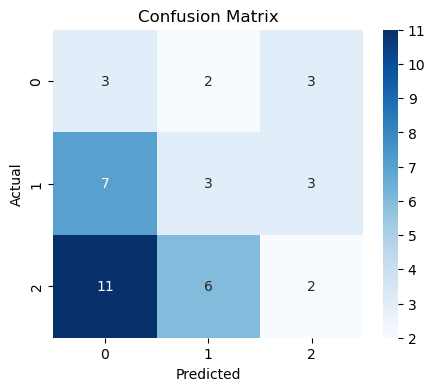

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
cm1=confusion_matrix(y_test, pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
pred_knn = knn.predict(X_test_scaled)
print("KNN")
accuracy_score(y_test,pred_knn)

KNN


0.625

In [47]:
df['Total_Pollution_Index'] = (
    df['Air_Pollution_Index'] +
    df['Water_Pollution_Index'] +
    df['Soil_Pollution_Index']
)

median_value = df['Total_Pollution_Index'].median()
df['Total_Pollution_Index'] = df['Total_Pollution_Index'].apply(
    lambda x: 0 if x < median_value else 1
)

median_value

374.985

In [ ]:
cm2 = confusion_matrix(y_test,pred_knn)
cm2

In [ ]:
cm2 = confusion_matrix(y_test, pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for K-Nearest Neighbour")
plt.show()

In [ ]:
classification_report(y_test, pred_knn)

In [21]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print(" Decision Tree")
accuracy_score(y_test, pred_dt)

 Decision Tree


0.975

In [22]:
cm3=confusion_matrix(y_test, pred_dt)
cm3

array([[ 8,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 19]])

In [23]:
classification_report(y_test, pred_dt)

'              precision    recall  f1-score   support\n\n        High       1.00      1.00      1.00         8\n         Low       1.00      0.92      0.96        13\n      Medium       0.95      1.00      0.97        19\n\n    accuracy                           0.97        40\n   macro avg       0.98      0.97      0.98        40\nweighted avg       0.98      0.97      0.97        40\n'

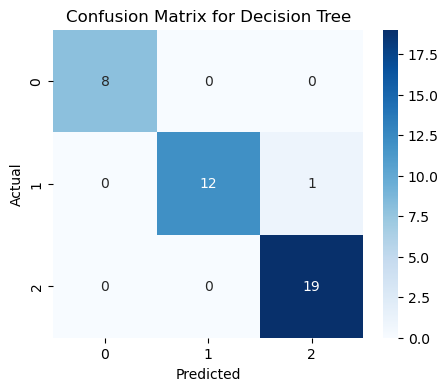

In [24]:
cm3 = confusion_matrix(y_test, pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Decision Tree")
plt.show()